# Import Modules

In [2]:
import h2o
import pandas
import random
from PIL import Image

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
project_path="/gtc-2017"

# Connect or Start H2O

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 hours 39 mins
H2O cluster version:,3.11.0.226
H2O cluster version age:,2 days
H2O cluster name:,root
H2O cluster total nodes:,1
H2O cluster free memory:,24.59 Gb
H2O cluster total cores:,20
H2O cluster allowed cores:,20
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


# Import Data

Import data into H2O.

In [6]:
mnist_training = h2o.import_file(project_path+"/data/mnist-training.csv")
mnist_testing = h2o.import_file(project_path+"/data/mnist-testing.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Change the "label" column to a factor (i.e. categorical feature).

In [7]:
mnist_training["label"] = mnist_training["label"].asfactor()
mnist_testing["label"] = mnist_testing["label"].asfactor()

# Explore Data

In [8]:
mnist_training.head()

uri,label
/gtc-2017/data/mnist_png/training/6/6453.png,6
/gtc-2017/data/mnist_png/training/6/13970.png,6
/gtc-2017/data/mnist_png/training/6/21967.png,6
/gtc-2017/data/mnist_png/training/6/11277.png,6
/gtc-2017/data/mnist_png/training/6/27350.png,6
/gtc-2017/data/mnist_png/training/6/32119.png,6
/gtc-2017/data/mnist_png/training/6/44201.png,6
/gtc-2017/data/mnist_png/training/6/58770.png,6
/gtc-2017/data/mnist_png/training/6/39440.png,6
/gtc-2017/data/mnist_png/training/6/41988.png,6


# Test GPU Driver

In [9]:
!nvidia-smi

Mon May  8 22:36:42 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 378.13                 Driver Version: 378.13                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 0000:02:00.0      On |                  N/A |
| 27%   35C    P8    11W / 180W |   1206MiB /  8112MiB |     24%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Build Deep Water Model

In [10]:
from h2o.estimators.deepwater import H2ODeepWaterEstimator
model_mnist_lenet_mx = H2ODeepWaterEstimator(epochs=80, network="lenet")
model_mnist_lenet_mx.train(x=["uri"], y="label",
                           training_frame=mnist_training,
                           validation_frame=mnist_testing,
                           model_id="model_mnist_lenet_mx")

deepwater Model Build progress: |█████████████████████████████████████████| 100%


In [11]:
model_mnist_lenet_mx.show()

Model Details
H2ODeepWaterEstimator :  Deep Water
Model Key:  model_mnist_lenet_mx


ModelMetricsMultinomial: deepwater
** Reported on train data. **

MSE: 2.89562829313e-06
RMSE: 0.00170165457515
LogLoss: 0.000140073892674
Mean Per-Class Error: 0.0
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
972.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 972
0.0,1131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0 / 1,131"
0.0,0.0,984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 984
0.0,0.0,0.0,954.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 954
0.0,0.0,0.0,0.0,950.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 950
0.0,0.0,0.0,0.0,0.0,916.0,0.0,0.0,0.0,0.0,0.0,0 / 916
0.0,0.0,0.0,0.0,0.0,0.0,962.0,0.0,0.0,0.0,0.0,0 / 962
0.0,0.0,0.0,0.0,0.0,0.0,0.0,1041.0,0.0,0.0,0.0,"0 / 1,041"
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,961.0,0.0,0.0,0 / 961
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1041.0,0.0,"0 / 1,041"


Top-10 Hit Ratios: 


k,hit_ratio
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0
10,1.0



ModelMetricsMultinomial: deepwater
** Reported on validation data. **

MSE: 0.00835329466284
RMSE: 0.0913963602275
LogLoss: 0.0517880486905
Mean Per-Class Error: 0.00955158340006
Confusion Matrix: vertical: actual; across: predicted



0,1,2,3,4,5,6,7,8,9,Error,Rate
977.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0030612,3 / 980
2.0,1130.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0044053,"5 / 1,135"
2.0,1.0,1025.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0067829,"7 / 1,032"
0.0,0.0,0.0,1003.0,0.0,3.0,0.0,1.0,3.0,0.0,0.0069307,"7 / 1,010"
0.0,0.0,0.0,0.0,974.0,0.0,3.0,0.0,0.0,5.0,0.0081466,8 / 982
1.0,0.0,0.0,5.0,0.0,885.0,1.0,0.0,0.0,0.0,0.0078475,7 / 892
6.0,3.0,0.0,0.0,1.0,2.0,945.0,0.0,1.0,0.0,0.0135699,13 / 958
0.0,1.0,5.0,1.0,0.0,0.0,0.0,1018.0,0.0,3.0,0.0097276,"10 / 1,028"
3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,964.0,3.0,0.0102669,10 / 974
0.0,4.0,0.0,2.0,8.0,3.0,1.0,2.0,5.0,984.0,0.0247770,"25 / 1,009"


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9905
2,0.9988
3,0.9995
4,0.9998000
5,0.9999999
6,0.9999999
7,0.9999999
8,0.9999999
9,0.9999999
10,0.9999999


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2017-05-08 22:36:43,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2017-05-08 22:36:43,0.866 sec,11010 obs/sec,0.0170667,1,1024.0,0.3900525,0.9254920,0.1725182,0.3715542,0.8308918,0.1549
,2017-05-08 22:36:50,8.215 sec,15458 obs/sec,1.7749333,104,106496.0,0.1082491,0.0527965,0.0142252,0.1280832,0.0725288,0.0198
,2017-05-08 22:36:56,13.699 sec,15838 obs/sec,3.1402667,184,188416.0,0.0930340,0.0372236,0.0106941,0.1233862,0.0744711,0.0175
,2017-05-08 22:37:01,18.778 sec,15942 obs/sec,4.3861333,257,263168.0,0.0783780,0.0270622,0.0080710,0.1195637,0.0745805,0.0164
,2017-05-08 22:37:06,23.829 sec,16062 obs/sec,5.6490667,331,338944.0,0.0493387,0.0106804,0.0028249,0.1039225,0.0610523,0.0126
,2017-05-08 22:37:11,28.861 sec,16118 obs/sec,6.8949333,404,413696.0,0.0368055,0.0059083,0.0016142,0.1018229,0.0537627,0.0124
,2017-05-08 22:37:16,33.959 sec,16231 obs/sec,8.1749333,479,490496.0,0.0325304,0.0044202,0.0014124,0.1022455,0.0634701,0.0122
,2017-05-08 22:37:22,39.390 sec,16293 obs/sec,9.5573333,560,573440.0,0.0198776,0.0014707,0.0004036,0.0952943,0.0528499,0.0106
,2017-05-08 22:37:27,44.479 sec,16286 obs/sec,10.8032,633,648192.0,0.0125976,0.0007393,0.0001009,0.0950160,0.0534240,0.0103


# Extract Deep Features from Model

In [12]:
extracted_features = model_mnist_lenet_mx.deepfeatures(mnist_testing, "flatten0_output")

deepfeatures progress: |██████████████████████████████████████████████████| 100%


Explore the dimensionality of the deep feature and view a few samples.

In [13]:
extracted_features.dim

[10000, 800]

In [14]:
print(extracted_features[0:4,:])

DF.flatten0_output.C1 DF.flatten0_output.C2 DF.flatten0_output.C3 DF.flatten0_output.C4 DF.flatten0_output.C5 DF.flatten0_output.C6 DF.flatten0_output.C7 DF.flatten0_output.C8 DF.flatten0_output.C9 DF.flatten0_output.C10 DF.flatten0_output.C11 DF.flatten0_output.C12 DF.flatten0_output.C13 DF.flatten0_output.C14 DF.flatten0_output.C15 DF.flatten0_output.C16 DF.flatten0_output.C17 DF.flatten0_output.C18 DF.flatten0_output.C19 DF.flatten0_output.C20 DF.flatten0_output.C21 DF.flatten0_output.C22 DF.flatten0_output.C23 DF.flatten0_output.C24 DF.flatten0_output.C25 DF.flatten0_output.C26 DF.flatten0_output.C27 DF.flatten0_output.C28 DF.flatten0_output.C29 DF.flatten0_output.C30 DF.flatten0_output.C31 DF.flatten0_output.C32 DF.flatten0_output.C33 DF.flatten0_output.C34 DF.flatten0_output.C35 DF.flatten0_output.C36 DF.flatten0_output.C37 DF.flatten0_output.C38 DF.flatten0_output.C39 DF.flatten0_output.C40 DF.flatten0_output.C41 DF.flatten0_output.C42 DF.flatten0_output.C43 DF.flatten0_output.C44 DF.flatten0_output.C45 DF.flatten0_output.C46 DF.flatten0_output.C47 DF.flatten0_output.C48 DF.flatten0_output.C49 DF.flatten0_output.C50 DF.flatten0_output.C51 DF.flatten0_output.C52 DF.flatten0_output.C53 DF.flatten0_output.C54 DF.flatten0_output.C55 DF.flatten0_output.C56 DF.flatten0_output.C57 DF.flatten0_output.C58 DF.flatten0_output.C59 DF.flatten0_output.C60 DF.flatten0_output.C61 DF.flatten0_output.C62 DF.flatten0_output.C63 DF.flatten0_output.C64 DF.flatten0_output.C65 DF.flatten0_output.C66 DF.flatten0_output.C67 DF.flatten0_output.C68 DF.flatten0_output.C69 DF.flatten0_output.C70 DF.flatten0_output.C71 DF.flatten0_output.C72 DF.flatten0_output.C73 DF.flatten0_output.C74 DF.flatten0_output.C75 DF.flatten0_output.C76 DF.flatten0_output.C77 DF.flatten0_output.C78 DF.flatten0_output.C79 DF.flatten0_output.C80 DF.flatten0_output.C81 DF.flatten0_output.C82 DF.flatten0_output.C83 DF.flatten0_output.C84 DF.flatten0_output.C85 DF.flatten0_output.C86 DF.flatten0_output.C87 DF.flatten0_output.C88 DF.flatten0_output.C89 DF.flatten0_output.C90 DF.flatten0_output.C91 DF.flatten0_output.C92 DF.flatten0_output.C93 DF.flatten0_output.C94 DF.flatten0_output.C95 DF.flatten0_output.C96 DF.flatten0_output.C97 DF.flatten0_output.C98 DF.flatten0_output.C99 DF.flatten0_output.C100 DF.flatten0_output.C101 DF.flatten0_output.C102 DF.flatten0_output.C103 DF.flatten0_output.C104 DF.flatten0_output.C105 DF.flatten0_output.C106 DF.flatten0_output.C107 DF.flatten0_output.C108 DF.flatten0_output.C109 DF.flatten0_output.C110 DF.flatten0_output.C111 DF.flatten0_output.C112 DF.flatten0_output.C113 DF.flatten0_output.C114 DF.flatten0_output.C115 DF.flatten0_output.C116 DF.flatten0_output.C117 DF.flatten0_output.C118 DF.flatten0_output.C119 DF.flatten0_output.C120 DF.flatten0_output.C121 DF.flatten0_output.C122 DF.flatten0_output.C123 DF.flatten0_output.C124 DF.flatten0_output.C125 DF.flatten0_output.C126 DF.flatten0_output.C127 DF.flatten0_output.C128 DF.flatten0_output.C129 DF.flatten0_output.C130 DF.flatten0_output.C131 DF.flatten0_output.C132 DF.flatten0_output.C133 DF.flatten0_output.C134 DF.flatten0_output.C135 DF.flatten0_output.C136 DF.flatten0_output.C137 DF.flatten0_output.C138 DF.flatten0_output.C139 DF.flatten0_output.C140 DF.flatten0_output.C141 DF.flatten0_output.C142 DF.flatten0_output.C143 DF.flatten0_output.C144 DF.flatten0_output.C145 DF.flatten0_output.C146 DF.flatten0_output.C147 DF.flatten0_output.C148 DF.flatten0_output.C149 DF.flatten0_output.C150 DF.flatten0_output.C151 DF.flatten0_output.C152 DF.flatten0_output.C153 DF.flatten0_output.C154 DF.flatten0_output.C155 DF.flatten0_output.C156 DF.flatten0_output.C157 DF.flatten0_output.C158 DF.flatten0_output.C159 DF.flatten0_output.C160 DF.flatten0_output.C161 DF.flatten0_output.C162 DF.flatten0_output.C163 DF.flatten0_output.C164 DF.flatten0_output.C165 DF.flatten0_output.C166 DF.flatten0_output.C167 DF.flatten0_output.C168 DF.flatten0_output.C169 DF.flatten0_output.C170 DF.flatten0_output.C171 DF.f

# Run Similarity Analysis

Select the number of images to be the reference.

In [15]:
num_ref_images = 3

Sample specified number of images from the testing data set.

In [16]:
pd_mnist_testing = mnist_testing.as_data_frame()
pd_mnist_sample = pd_mnist_testing.sample(n=num_ref_images)

In [17]:
pd_mnist_sample

,uri,label
29,/gtc-2017/data/mnist_png/testing/6/5378.png,6
2713,/gtc-2017/data/mnist_png/testing/9/1714.png,9
3472,/gtc-2017/data/mnist_png/testing/7/3736.png,7


Just some code to keep track of the reference image indices and values as well as the non-reference images.

In [18]:
list_mnist_sample_label = pd_mnist_sample["label"].tolist()
list_mnist_sample_index = pd_mnist_sample.index.values.tolist()
list_mnist_sample_index.sort()
list_mnist_all_index = pd_mnist_testing.index.values.tolist()
set_not_sample_index = set(list_mnist_all_index).symmetric_difference(set(list_mnist_sample_index))
list_mnist_not_sample_index = list(set_not_sample_index)

In [19]:
ref_images = mnist_testing[list_mnist_sample_index]

Let's take a look at the reference images.

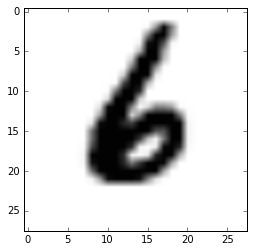

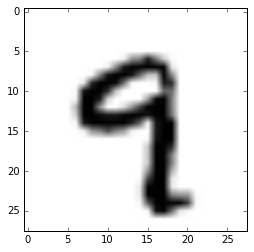

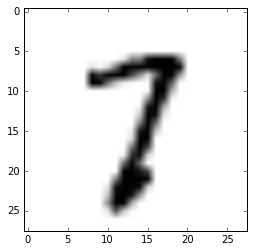

In [20]:
for i in list_mnist_sample_index:
    uri = mnist_testing[i,"uri"]
    img=mpimg.imread(uri)
    imgplot = plt.imshow(img, cmap="Greys")
    plt.show()

Divide the extracted deep feature set into the reference images and the "rest".

In [21]:
ref_digits_features = extracted_features[list_mnist_sample_index,:]
rest_digits_features = extracted_features[list_mnist_not_sample_index,:]
h2o.assign(ref_digits_features, "ref_digits_features")
h2o.assign(rest_digits_features, "rest_digits_features")

DF.flatten0_output.C1 DF.flatten0_output.C2 DF.flatten0_output.C3 DF.flatten0_output.C4 DF.flatten0_output.C5 DF.flatten0_output.C6 DF.flatten0_output.C7 DF.flatten0_output.C8 DF.flatten0_output.C9 DF.flatten0_output.C10 DF.flatten0_output.C11 DF.flatten0_output.C12 DF.flatten0_output.C13 DF.flatten0_output.C14 DF.flatten0_output.C15 DF.flatten0_output.C16 DF.flatten0_output.C17 DF.flatten0_output.C18 DF.flatten0_output.C19 DF.flatten0_output.C20 DF.flatten0_output.C21 DF.flatten0_output.C22 DF.flatten0_output.C23 DF.flatten0_output.C24 DF.flatten0_output.C25 DF.flatten0_output.C26 DF.flatten0_output.C27 DF.flatten0_output.C28 DF.flatten0_output.C29 DF.flatten0_output.C30 DF.flatten0_output.C31 DF.flatten0_output.C32 DF.flatten0_output.C33 DF.flatten0_output.C34 DF.flatten0_output.C35 DF.flatten0_output.C36 DF.flatten0_output.C37 DF.flatten0_output.C38 DF.flatten0_output.C39 DF.flatten0_output.C40 DF.flatten0_output.C41 DF.flatten0_output.C42 DF.flatten0_output.C43 DF.flatten0_output.C44 DF.flatten0_output.C45 DF.flatten0_output.C46 DF.flatten0_output.C47 DF.flatten0_output.C48 DF.flatten0_output.C49 DF.flatten0_output.C50 DF.flatten0_output.C51 DF.flatten0_output.C52 DF.flatten0_output.C53 DF.flatten0_output.C54 DF.flatten0_output.C55 DF.flatten0_output.C56 DF.flatten0_output.C57 DF.flatten0_output.C58 DF.flatten0_output.C59 DF.flatten0_output.C60 DF.flatten0_output.C61 DF.flatten0_output.C62 DF.flatten0_output.C63 DF.flatten0_output.C64 DF.flatten0_output.C65 DF.flatten0_output.C66 DF.flatten0_output.C67 DF.flatten0_output.C68 DF.flatten0_output.C69 DF.flatten0_output.C70 DF.flatten0_output.C71 DF.flatten0_output.C72 DF.flatten0_output.C73 DF.flatten0_output.C74 DF.flatten0_output.C75 DF.flatten0_output.C76 DF.flatten0_output.C77 DF.flatten0_output.C78 DF.flatten0_output.C79 DF.flatten0_output.C80 DF.flatten0_output.C81 DF.flatten0_output.C82 DF.flatten0_output.C83 DF.flatten0_output.C84 DF.flatten0_output.C85 DF.flatten0_output.C86 DF.flatten0_output.C87 DF.flatten0_output.C88 DF.flatten0_output.C89 DF.flatten0_output.C90 DF.flatten0_output.C91 DF.flatten0_output.C92 DF.flatten0_output.C93 DF.flatten0_output.C94 DF.flatten0_output.C95 DF.flatten0_output.C96 DF.flatten0_output.C97 DF.flatten0_output.C98 DF.flatten0_output.C99 DF.flatten0_output.C100 DF.flatten0_output.C101 DF.flatten0_output.C102 DF.flatten0_output.C103 DF.flatten0_output.C104 DF.flatten0_output.C105 DF.flatten0_output.C106 DF.flatten0_output.C107 DF.flatten0_output.C108 DF.flatten0_output.C109 DF.flatten0_output.C110 DF.flatten0_output.C111 DF.flatten0_output.C112 DF.flatten0_output.C113 DF.flatten0_output.C114 DF.flatten0_output.C115 DF.flatten0_output.C116 DF.flatten0_output.C117 DF.flatten0_output.C118 DF.flatten0_output.C119 DF.flatten0_output.C120 DF.flatten0_output.C121 DF.flatten0_output.C122 DF.flatten0_output.C123 DF.flatten0_output.C124 DF.flatten0_output.C125 DF.flatten0_output.C126 DF.flatten0_output.C127 DF.flatten0_output.C128 DF.flatten0_output.C129 DF.flatten0_output.C130 DF.flatten0_output.C131 DF.flatten0_output.C132 DF.flatten0_output.C133 DF.flatten0_output.C134 DF.flatten0_output.C135 DF.flatten0_output.C136 DF.flatten0_output.C137 DF.flatten0_output.C138 DF.flatten0_output.C139 DF.flatten0_output.C140 DF.flatten0_output.C141 DF.flatten0_output.C142 DF.flatten0_output.C143 DF.flatten0_output.C144 DF.flatten0_output.C145 DF.flatten0_output.C146 DF.flatten0_output.C147 DF.flatten0_output.C148 DF.flatten0_output.C149 DF.flatten0_output.C150 DF.flatten0_output.C151 DF.flatten0_output.C152 DF.flatten0_output.C153 DF.flatten0_output.C154 DF.flatten0_output.C155 DF.flatten0_output.C156 DF.flatten0_output.C157 DF.flatten0_output.C158 DF.flatten0_output.C159 DF.flatten0_output.C160 DF.flatten0_output.C161 DF.flatten0_output.C162 DF.flatten0_output.C163 DF.flatten0_output.C164 DF.flatten0_output.C165 DF.flatten0_output.C166 DF.flatten0_output.C167 DF.flatten0_output.C168 DF.flatten0_output.C169 DF.flatten0_output.C170 DF.flatten0_output.C171 DF.f

Run the "distance" function to compute the similarity between each reference image and the rest of the set.  The similarity measure can be: `"cosine"`, `"cosine_sq"`, `"l1"` or `"l2"`.

In [22]:
similarities = rest_digits_features.distance(ref_digits_features, "cosine")
similarities.head()

C1,C2,C3
0.412074,0.195431,0.129486
0.689514,0.156213,0.0832714
0.779693,0.154987,0.0916983
0.647453,0.133843,0.124878
0.647502,0.164986,0.0302756
0.402716,0.127312,0.277786
0.68801,0.188322,0.0808483
0.504922,0.0993693,0.0566928
0.499725,0.107819,0.102117
0.699148,0.155255,0.073487


Sort the similarity data frame (most similar to least) on the first reference image (this can be changed by changing the `"by"` argument).

In [23]:
pd_similarities = similarities.as_data_frame()
pd_similarities.sort_values(by="C1", ascending=False, inplace=True)
pd_similarities.head()

,C1,C2,C3
155,0.913982,0.107908,0.063072
17,0.910179,0.140488,0.079415
372,0.904995,0.104517,0.069935
839,0.903525,0.097931,0.095326
38,0.894777,0.110336,0.063543


Show the most similar images.

9997


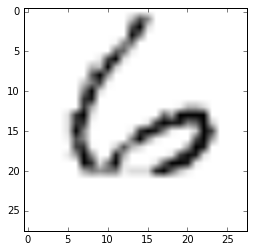

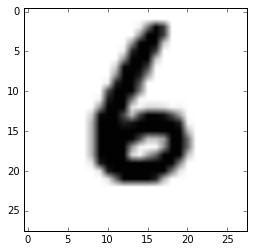

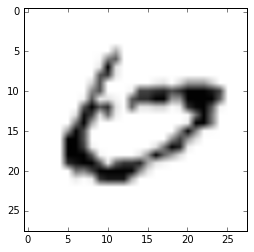

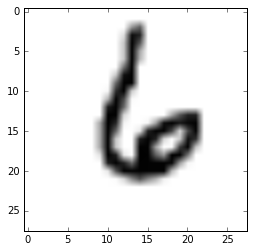

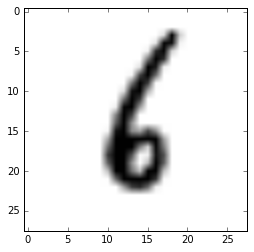

In [24]:
list_similiar = pd_similarities["C1"].index.values.tolist()
print(len(list_similiar))

for i in list_similiar[0:5]:
    uri = mnist_testing[i,"uri"]
    img=mpimg.imread(uri)
    imgplot = plt.imshow(img, cmap="Greys")
    plt.show()

Show the least similar images.

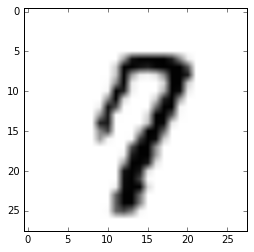

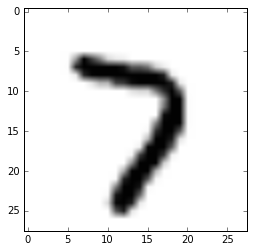

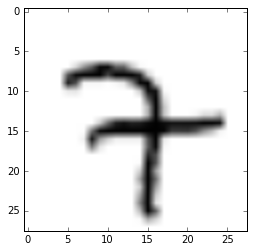

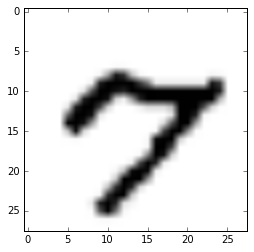

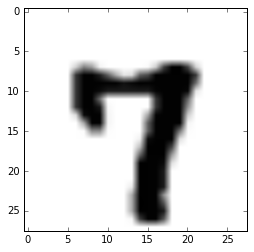

In [25]:
for i in list_similiar[9990:9995]:
    uri = mnist_testing[i,"uri"]
    img=mpimg.imread(uri)
    imgplot = plt.imshow(img, cmap="Greys")
    plt.show()